# Laboratorio 1 - Práctica 1.
### Gonzalo de las Heras de Matías - Jorge de la Fuente Tagarro
## Impacto de las restricciones de tráfico en la calidad del aire.

![title](Images/madrid.jpg)

### Objetivo 

El 30 de diciembre de 2016 el Ayuntamiento de Madrid empieza a restringir el tráfico al centro de la ciudad
mediante la aplicación del escenario 3 del protocolo de contaminación. Esta fue la primera vez que se aplicó
un escenario tan restrictivo. Demuestra mediante visualizaciones de datos que ha ocurrido después de ello.
Para dicho problema, haremos uso de un dataset con datos sobre la calidad del aire en Madrid desde 2001. El
dataset contiene un archivo csv por año. Dentro de cada uno de ellos habrá medidas diarias de distintas
estaciones. Estas estaciones miden diferentes parámetros y no siempre todos se registran en cada una de las
estaciones.

Enlace dataset: https://www.kaggle.com/decide-soluciones/air-quality-madrid/downloads/csvs_per_year.zip/5

#### Librerias

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import cm
import warnings
warnings.filterwarnings('ignore')

## Ejercicio 1
#### Lo primero que tendremos que hacer es cargar todos los archivos csv en un mismo DataFrame para poder manipularlos. Habrá que comprobar si existen datos redundantes o anómalos.

#### Para medir la calidad del aire de un día obtendremos el peor valor de cada estación meteorológica ese día y después calcularemos la media de estos. Con dicho valor se estimará como de buena es la calidad teniendo en cuenta la siguiente tabla. Al final habrá que hacer una transformación de valores continuos a categóricos. 

#### Proporcionar dicha información en un DataFrame y luego guardarlo en un archivo csv.

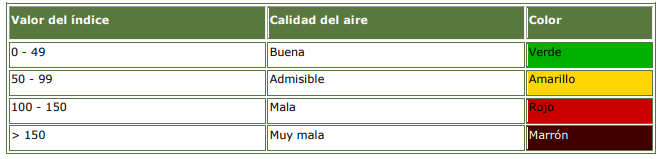

#### Funciones

In [2]:
# Función para categorizar la media del aire.
def custom_categorical(valor):
    if valor < 49:
        return 1
    if valor < 99:
        return 2
    if valor < 150:
        return 3
    return 4

<font color = 'blue'>Primero tenemos que unir todos los ficheros de datos en uno solo.</font>

In [3]:
# Ruta de los ficheros.
ruta = 'Datos/Original/'

# Carga de los ficheros.
ficheros = glob.glob(ruta + "/*.csv")
Dataframe = pd.DataFrame()
lista_dataframe = []
for fichero in ficheros:
    dataframe_temp = pd.read_csv(fichero, index_col=0, header=0)
    lista_dataframe.append(dataframe_temp)
    
# Unión de los ficheros.
Dataframe = pd.concat(lista_dataframe, sort=False)

# Guardamos el csv unido.
Dataframe.to_csv("Datos/datos_unidos.csv", encoding="ISO-8859-1")

# Contamos el número de registros del dataset.
print("Hay " + str(len(Dataframe)) + " registros")

Hay 3808224 registros


<font color = 'blue'>Cargamos el fichero de datos unido y lo tratamos para limpiar y organizar el dataset.</font>

In [4]:
# Carga del fichero de datos unido.
Dataframe = pd.read_csv("Datos/datos_unidos.csv", encoding="ISO-8859-1")

# Ordenación por fecha.
Dataframe = Dataframe.sort_values(by='date', ascending=True)

# Reseteo del índice.
Dataframe = Dataframe.reset_index(drop=True)

# Redondeamos los datos 2 decimales.
Dataframe = round(Dataframe, 3)

# Transformamos la columna 'date' a datetime.
Dataframe["date"] = pd.to_datetime(Dataframe["date"])

# Eliminamos la hora pues no la necesitamos para el estudio y así agrupamos mejor.
Dataframe["date"] = Dataframe["date"].dt.date

# Transformamos de nuevo la columna 'date' a datetime.
Dataframe["date"] = pd.to_datetime(Dataframe["date"])

# Transformamos la estación a tipo string para poder sacar el máximo más fácilmente.
Dataframe["station"] = Dataframe['station'].astype(str)

# Calculamos el valor máximo de cada registro (fila).
Dataframe["max"] = Dataframe.max(axis=1, numeric_only=True)

# Guardamos el dataset.
Dataframe.to_csv("Datos/datos_agrupados.csv", encoding="ISO-8859-1")

# Mostramos los 10 primeros.
Dataframe.head(10)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station,CH4,NO,max
0,2001-01-01,NaN,1.45,NaN,NaN,NaN,50.39,159.70,NaN,4.18,21.22,NaN,NaN,10.86,NaN,NaN,28079019,NaN,NaN,159.70
1,2001-01-01,3.23,1.25,2.56,4.58,0.24,55.29,120.00,2.22,7.83,30.56,NaN,1.80,22.10,1.58,10.74,28079099,NaN,NaN,120.00
2,2001-01-01,2.13,0.87,1.44,3.16,NaN,53.40,100.00,1.06,8.35,36.67,NaN,1.28,11.42,NaN,7.04,28079025,NaN,NaN,100.00
3,2001-01-01,0.40,0.79,NaN,2.09,0.14,47.32,54.95,1.17,3.40,14.44,NaN,0.86,9.69,1.51,5.83,28079024,NaN,NaN,54.95
4,2001-01-01,1.08,0.67,0.96,NaN,0.10,43.82,68.61,NaN,32.49,11.89,NaN,NaN,9.35,1.42,4.49,28079023,NaN,NaN,68.61
5,2001-01-01,3.00,1.55,NaN,NaN,NaN,55.27,126.70,NaN,6.23,19.61,NaN,NaN,27.27,NaN,7.79,28079022,NaN,NaN,126.70
6,2001-01-01,NaN,0.92,NaN,NaN,NaN,55.16,117.00,NaN,4.99,18.20,NaN,NaN,32.52,NaN,NaN,28079021,NaN,NaN,117.00
7,2001-01-01,NaN,1.12,NaN,NaN,NaN,81.36,117.20,NaN,12.89,27.47,NaN,NaN,15.82,NaN,NaN,28079036,NaN,NaN,117.20
8,2001-01-01,NaN,3.62,NaN,NaN,0.79,59.15,283.90,NaN,7.44,40.14,NaN,NaN,23.39,2.15,NaN,28079018,NaN,NaN,283.90
9,2001-01-01,NaN,1.23,NaN,NaN,NaN,55.75,127.20,NaN,8.38,44.95,NaN,NaN,14.56,NaN,NaN,28079017,NaN,NaN,127.20


<font color = 'blue'>Ya tenemos el dataset con el campo 'date' sin la hora, los datos redondeados a 2 decimales y con el máximo valor de cada fila en una nueva columna 'max'.</font>

<font color = 'blue'>Seguimos limpiando y organizando el dataset para obtener la calidad del aire media medida por una estación en cada día.</font>

In [5]:
print("Hay: " + str(len(Dataframe[Dataframe["max"] != Dataframe["max"]])) + " columnas todo a NaN.")

# Eliminamos los registros cuyas filas de datos están todos a NaN y reseteamos el índice.
Dataframe = Dataframe.drop(Dataframe[Dataframe["max"] != Dataframe["max"]].index)

# Reseteo del índice.
Dataframe = Dataframe.reset_index(drop=True)

print("Quedan: " + str(len(Dataframe[Dataframe["max"] != Dataframe["max"]])) + " columnas todo a NaN.")

# Agrupamos por estación y fecha (día concreto) para sacar la media de máximos valores medidos.
Dataframe = Dataframe.groupby(["station", "date"])['max'].mean()

# Reseteamos el índice.
Dataframe = Dataframe.reset_index()

# Guardamos el dataset.
Dataframe.to_csv("Datos/datos_preprocesados.csv", encoding="ISO-8859-1")

# Mostramos los 10 primeros.
Dataframe.head(10)

Hay: 13346 columnas todo a NaN.
Quedan: 0 columnas todo a NaN.


,station,date,max
0,28079001,2001-01-02,169.500000
1,28079001,2001-01-03,173.284583
2,28079001,2001-01-04,154.293333
3,28079001,2001-01-05,210.120833
4,28079001,2001-01-06,127.873750
5,28079001,2001-01-07,141.195417
6,28079001,2001-01-08,240.280417
7,28079001,2001-01-09,211.216667
8,28079001,2001-01-10,269.662500
9,28079001,2001-01-11,192.406250


<font color = 'blue'>Ahora ya tenemos el dataset libre de filas a NaN y con la media de los perores valores medidos por una estación a lo largo de un día (realiza una medición cada hora).</font>

## Ejercicio 2

#### Explica visualmente como se distribuyen las calidades del aire entre buena, admisible, mala y muy mala. Realiza para ello un pie chart. Que se puede concluir de dicho gráfico.

{1: 598, 2: 3490, 3: 1468, 4: 774}
['Buena' 'Admisible' 'Mala' 'Muy mala']


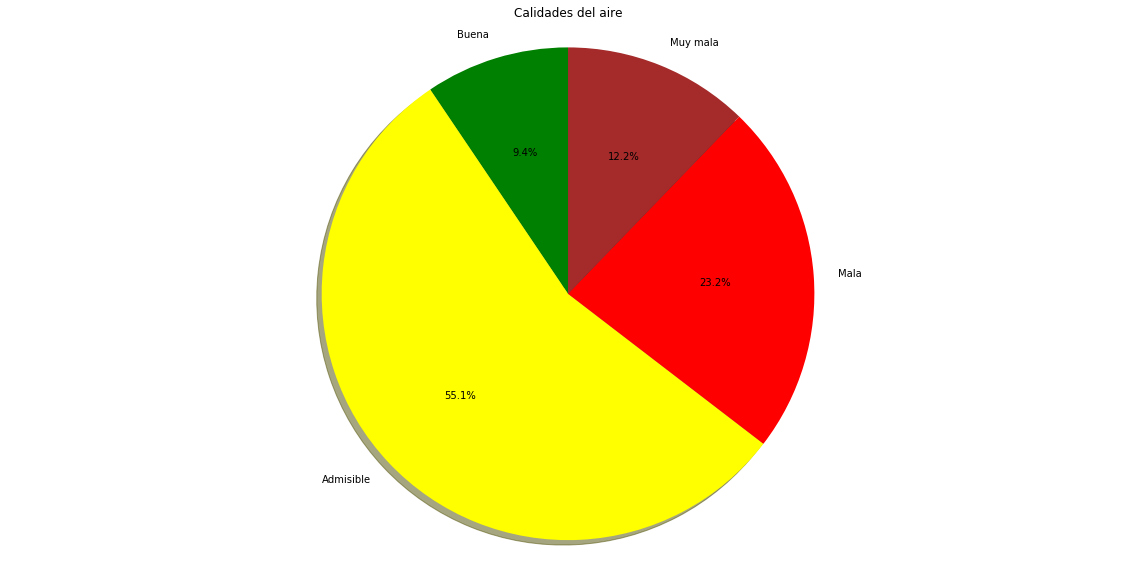

In [6]:
# Carga del fichero de datos unido.
Dataframe = pd.read_csv("Datos/datos_preprocesados.csv", encoding="ISO-8859-1", index_col=0)

# Sacamos la media de los peores valores medidos a lo largo de un día por todas las estaciones.
Dataframe = Dataframe.groupby("date")['max'].mean()

# Reseteamos el índice.
Dataframe = Dataframe.reset_index()

# Guardamos el dataset.
Dataframe.to_csv("Datos/datos_media_dia.csv", encoding="ISO-8859-1")

# Categorización del valor medio del aire para un día.
valores = Dataframe['max'].apply(lambda x: custom_categorical(x))

# Preparamos las listas para el pie chart.
unique, counts = np.unique(valores, return_counts=True)

# Mostramos los datos calculados.
print(dict(zip(unique, counts)))

# Etiquetas.
etiquetas = np.array(unique).astype('U') 
etiquetas[etiquetas == "1"] = "Buena"
etiquetas[etiquetas == "2"] = "Admisible"
etiquetas[etiquetas == "3"] = "Mala"
etiquetas[etiquetas == "4"] = "Muy mala"

# Colores
colores = np.copy(etiquetas)
colores[colores == "Buena"] = "Green"
colores[colores == "Admisible"] = "Yellow"
colores[colores == "Mala"] = "Red"
colores[colores == "Muy mala"] = "Brown"

print(etiquetas)

# Mostramos la gráfica.
fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(counts, labels=etiquetas, autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax.axis('equal')  
plt.title("Calidades del aire")
plt.show()

<font color = 'blue'>El aire de Madrid es admisible más de la mitad de los días, es malo o muy malo un tercio de los días y tan solo una décima parte de los días el aire es bueno.</font>

## Ejercicio 3

#### Una vez obtenida la calidad del aire para cada día, calcula la calidad media de cada mes para que sea más fácil saber si la contaminación ha disminuido desde que se restringió el acceso al centro de Madrid. Explica visualmente si los protocolos de restricciones de tráfico han tenido éxito. Utiliza para ello un diagrama de barras. ¿Podemos encontrar la diferencia entre lo que ocurría antes de aplicar el protocolo y después?

<font color = 'blue'>Para ello, creamos un diagrama de barras indicando los meses pre y post restricción.</font>

In [7]:
# Leemos el fichero de datos.
Dataframe = pd.read_csv("Datos/datos_media_dia.csv", encoding="ISO-8859-1", index_col=0)

# Transformamos la columna 'date' a datetime.
Dataframe["date"] = pd.to_datetime(Dataframe["date"])

# Creamos los dataframes para antes y después de la restricción y el auxiliar (Dataframe_Mes).
Dataframe_Mes = pd.DataFrame()
Dataframe_Post_Restriccion = pd.DataFrame() 
Dataframe_Pre_Restriccion = pd.DataFrame() 

# Agregamos las columnas de 'year', 'month' y 'mean'. 
Dataframe_Mes["year"] = Dataframe["date"].dt.year
Dataframe_Mes["month"] = Dataframe["date"].dt.month
Dataframe_Mes["mean"] = Dataframe["max"]

# Agrupamos por mes y reseteamos el índice.
Dataframe_Mes = round(Dataframe_Mes.groupby(["year", "month"]).mean(), 1)
Dataframe_Mes = Dataframe_Mes.reset_index()

# Dividimos el dataset por año antes y después de la restricción.
Dataframe_Pre_Restriccion = Dataframe_Mes[Dataframe_Mes["year"] < 2017]
Dataframe_Post_Restriccion = Dataframe_Mes[Dataframe_Mes["year"] > 2016]

# Agrupamos por mes, sacamos la media y redondeamos a 3 decimales y reseteamos el índice.
Dataframe_Post_Restriccion = round(Dataframe_Post_Restriccion.groupby(["month"]).mean(), 3)
Dataframe_Post_Restriccion = Dataframe_Post_Restriccion.reset_index()
Dataframe_Pre_Restriccion = round(Dataframe_Pre_Restriccion.groupby(["month"]).mean(), 3)
Dataframe_Pre_Restriccion = Dataframe_Pre_Restriccion.reset_index()

<font color = 'blue'>Preparamos la gráfica.</font>

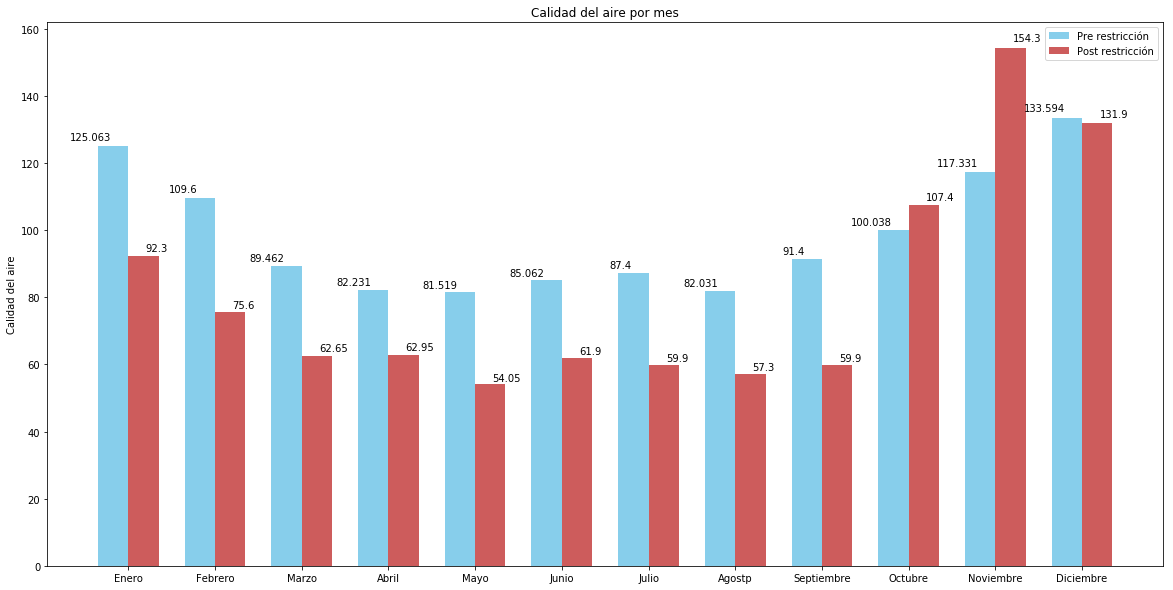

In [8]:
# Obtenemos la lista de valores a representar.
media_calidad_pre_restriccion = Dataframe_Pre_Restriccion["mean"]
media_calidad_post_restriccion = Dataframe_Post_Restriccion["mean"]

# Preparamos la gráfica.
ind = np.arange(len(media_calidad_pre_restriccion))
ancho = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - ancho/2, media_calidad_pre_restriccion, ancho, color='SkyBlue', label='Pre restricción')
rects2 = ax.bar(ind + ancho/2, media_calidad_post_restriccion, ancho, color='IndianRed', label='Post restricción')

ax.set_ylabel('Calidad del aire')
ax.set_title('Calidad del aire por mes')
ax.set_xticks(ind)
ax.set_xticklabels(('Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agostp', 'Septiembre', \
                    'Octubre', 'Noviembre', 'Diciembre' ))
ax.legend()

# Funciópn para pintar en la gráfica los distintos valores
def autolabel(rects, xpos='center'):
    xpos = xpos.lower() 
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

# Mostramos la gráfica.
plt.show()

<font color = 'blue'>Observando la gráfica podemos afirmar que en la mayoría de meses la restricción ha funcionado salvo en los meses finales del año cuyos datos son especialmente malos (en especial Noviembre del 2017). Esto puede deberse a otros factores climáticos (falta de lluvia, ausencia de viento, cambios en la humedad relativa del aire, etc.) que hayan propiciado la acumulación de contaminación atmosférica, factores de los cuales no hay datos incluidos en el dataset. </font>

#### Por último, queremos tratar de entender los cambios de la calidad del aire en estos últimos años. Obtén un diagrama de cajas donde cada caja corresponda a un año y haz una interpretación de los resultados.

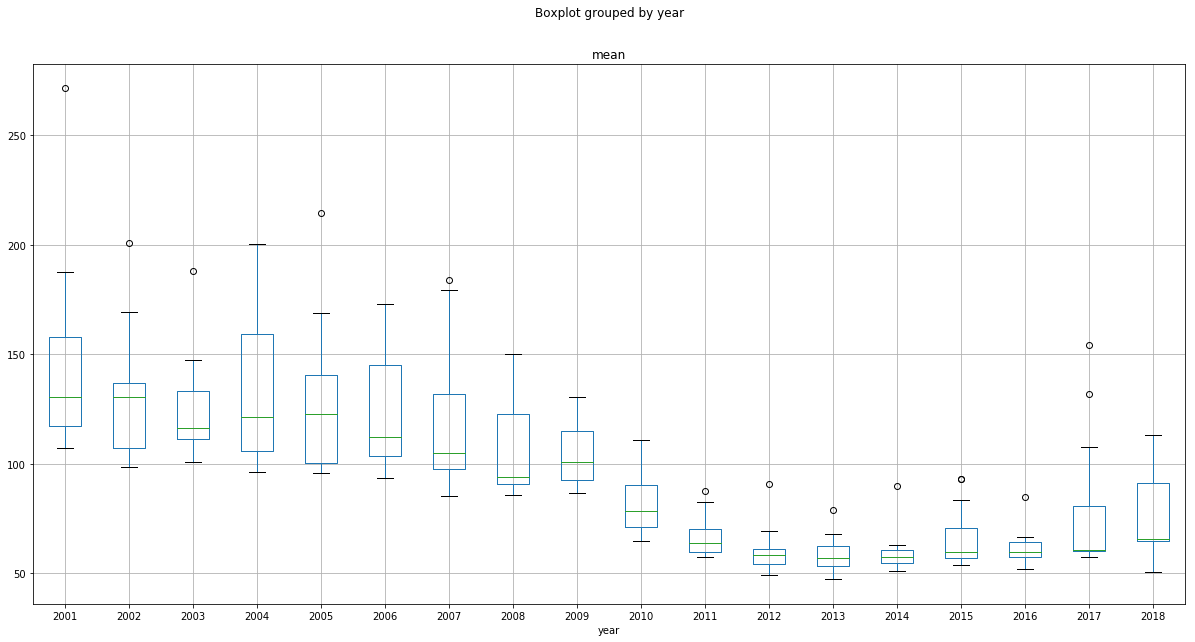

In [9]:
Dataframe_Mes.boxplot(column='mean', by='year', figsize=(20,10))

<font color = 'blue'>Observando la gráfica se aprecia una tendencia en la mejora de la calidad del aire y en los valores que se compactan desde 2001 hasta 2012 donde se estabilizan (exceptuando algún valor atípico). 
<br>    
En 2017 y 2018, se ven valores más altos y dispersos. Con el diagrama de barras anterior podemos justificar los valores especialmente altos y la dispersión alta de 2017 en base a los últimos 3 meses de 2017 (sobretodo Noviembre). Para poder obtener conclusiones con relación al año 2018, se necesitaría que estuvieran todos sus datos completados.</font>